In [1]:
import uproot
import numpy as np
import math
from matplotlib import pylab as plt
from ROOT import TTree, TFile, TH2D, TCanvas, TH1F, gROOT
from root_numpy import array2hist, hist2array, fill_hist, tree2array, root2array, list_trees
import pandas as pd
from root_pandas import read_root
from matplotlib import rc

# plt.rcParams['text.usetex'] = True
pd.set_option('use_inf_as_na', False)


def midpoints(hvals):
    hvals_shift=np.append(hvals[1:],0)

    midp=(hvals+hvals_shift)/2.0
    return midp[:-1]

font = {'family': 'sanserif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }

SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 19

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



Welcome to JupyROOT 6.22/02


In [2]:
filename="/work/lb8075/WNDNA/Tot_wholeNuclearDNA_v2.root"    
ur=uproot.pandas.iterate(filename, "ntuple", ['edep','flagParticle','flagProcess','flagVolume','x','y','z','eventID','Process'])

mylist=list(ur)        
dftot=pd.concat(mylist, ignore_index=True, sort=False  ,copy = False)
dftot

,edep,flagParticle,flagProcess,flagVolume,x,y,z,eventID,Process
0,0.092000,10.0,15.0,1.0,725.522619,1272.007728,-2194.665786,0.0,b'e-_G4DNAVibExcitation'
1,0.092000,10.0,15.0,2.0,726.106385,1272.217940,-2193.522794,0.0,b'e-_G4DNAVibExcitation'
2,10.790000,40.0,42.0,2.0,725.598362,1272.422928,-2193.795650,0.0,b'alpha_G4DNAIonisation'
3,16.050000,40.0,42.0,2.0,725.598362,1272.422928,-2127.759815,0.0,b'alpha_G4DNAIonisation'
4,13.390000,40.0,42.0,2.0,725.598362,1272.422928,-2127.683615,0.0,b'alpha_G4DNAIonisation'
...,...,...,...,...,...,...,...,...,...
2307531,3.824181,10.0,0.0,1.0,3801.270428,-391.399051,420.229907,9.0,b'e-_G4DNAElectronSolvation'
2307532,0.092000,10.0,15.0,1.0,3807.448208,-386.745868,425.041625,9.0,b'e-_G4DNAVibExcitation'
2307533,0.092000,10.0,15.0,1.0,3806.747586,-386.875352,425.441788,9.0,b'e-_G4DNAVibExcitation'
2307534,0.092000,10.0,15.0,1.0,3800.638960,-387.455987,423.244119,9.0,b'e-_G4DNAVibExcitation'


In [3]:
abc=dftot['Process'].value_counts()

In [6]:
abc

b'e-_G4DNAVibExcitation'         1613377
b'e-_G4DNAElectronSolvation'      315951
b'e-_G4DNAIonisation'             218679
b'alpha_G4DNAIonisation'           96935
b'e-_G4DNAExcitation'              36918
b'alpha_G4DNAExcitation'           10613
b'alpha+_G4DNAIonisation'           5090
b'e-_G4DNAAttachment'               5065
b'alpha_G4DNAElastic'               2095
b'alpha_G4DNAChargeDecrease'        1353
b'alpha+_G4DNAElastic'               779
b'alpha+_G4DNAExcitation'            346
b'helium_G4DNAIonisation'            247
b'alpha+_G4DNAChargeDecrease'         38
b'helium_G4DNAElastic'                31
b'helium_G4DNAExcitation'             19
Name: Process, dtype: int64

In [7]:
vals=abc.values
indices=abc.index
indices=indices.to_numpy()


<class 'numpy.ndarray'>
['e-_G4DNAVibExcitation' 'e-_G4DNAElectronSolvation' 'e-_G4DNAIonisation'
 'alpha_G4DNAIonisation' 'e-_G4DNAExcitation' 'alpha_G4DNAExcitation'
 'alpha+_G4DNAIonisation' 'e-_G4DNAAttachment' 'alpha_G4DNAElastic'
 'alpha_G4DNAChargeDecrease' 'alpha+_G4DNAElastic'
 'alpha+_G4DNAExcitation' 'helium_G4DNAIonisation'
 'alpha+_G4DNAChargeDecrease' 'helium_G4DNAElastic'
 'helium_G4DNAExcitation']


<ipython-input-41-96b0dc79fd5d>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(indices)


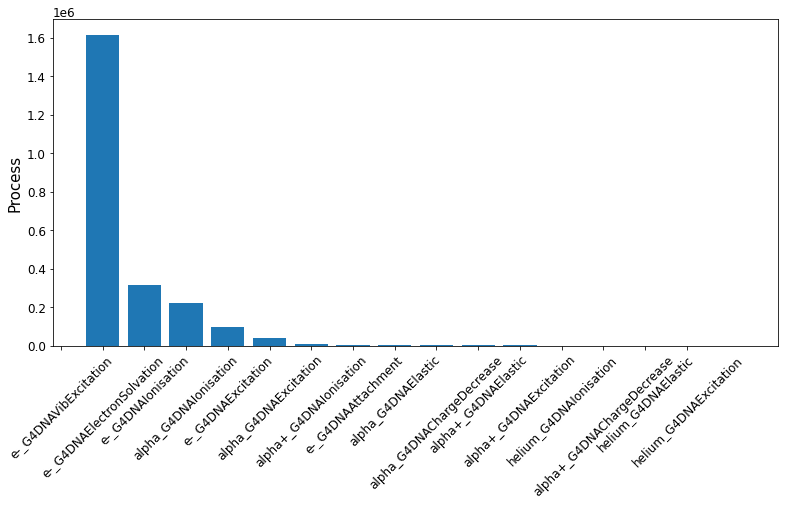

In [41]:
ind = np.arange(abc.size)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(1,1,figsize=(13,6))
print(type(indices))
indices=indices.astype('str')
print(indices)
ax.bar(ind,vals)
ax.set_xticklabels(indices)
plt.xticks(rotation=45)
ax.set_xticks(ind-1)
ax.set_ylabel("Process")
# ax.legend()
fig.savefig("WNDNA-EdepProcesses.png")

<class 'numpy.ndarray'>
['e-_G4DNAVibExcitation' 'e-_G4DNAElectronSolvation' 'e-_G4DNAIonisation'
 'alpha_G4DNAIonisation' 'e-_G4DNAExcitation' 'alpha_G4DNAExcitation'
 'alpha+_G4DNAIonisation' 'e-_G4DNAAttachment' 'alpha_G4DNAElastic'
 'alpha_G4DNAChargeDecrease' 'alpha+_G4DNAElastic'
 'alpha+_G4DNAExcitation' 'helium_G4DNAIonisation'
 'alpha+_G4DNAChargeDecrease' 'helium_G4DNAElastic'
 'helium_G4DNAExcitation']


<ipython-input-42-ac152cb8ea29>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(indices)


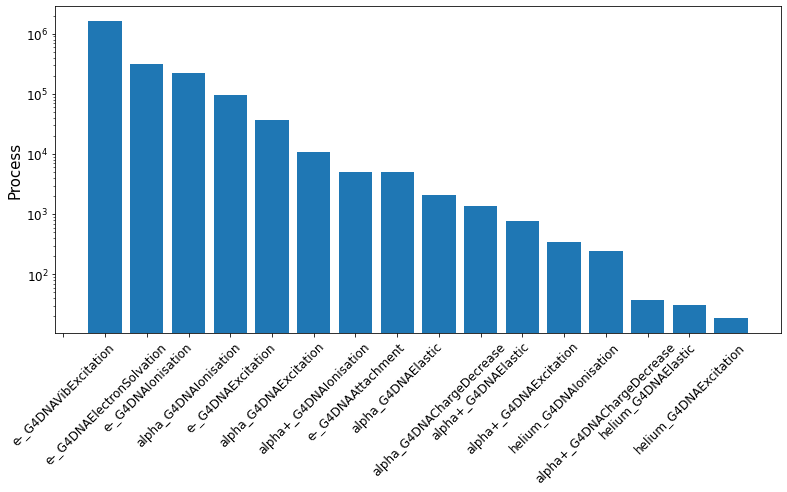

In [42]:
ind = np.arange(abc.size)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(1,1,figsize=(13,6))
print(type(indices))
indices=indices.astype('str')
print(indices)
ax.bar(ind,vals)
ax.set_xticklabels(indices)
plt.xticks(rotation=45)
ax.set_xticks(ind-1)
ax.set_ylabel("Process")
plt.yscale('log')
fig.savefig("WNDNA-EdepProcesses-log.png")

In [ ]:
dftot.plot.bar(x='Process')


Text(0.5, 0, 'Edep / ev')

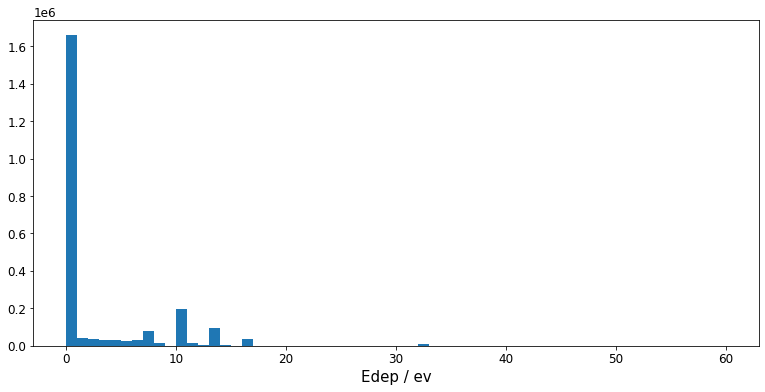

In [46]:
fig, ax = plt.subplots(1,1,figsize=(13,6))

_=plt.hist(dftot['edep'],bins=60,range=(0,60))
plt.xlabel('Edep / ev')


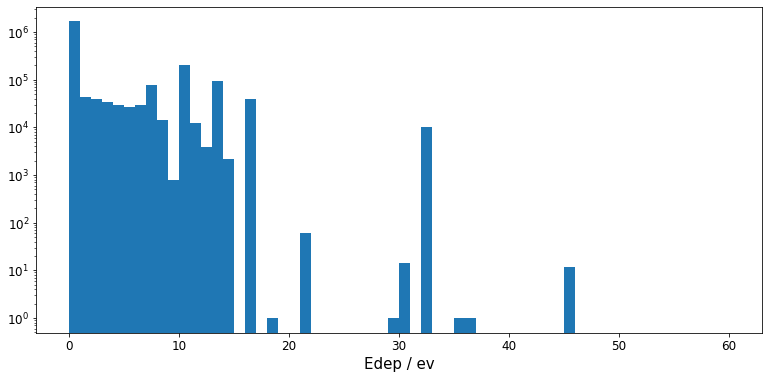

In [47]:
fig, ax = plt.subplots(1,1,figsize=(13,6))

_=plt.hist(dftot['edep'],bins=60,range=(0,60))
plt.xlabel('Edep / ev')
plt.yscale('log')

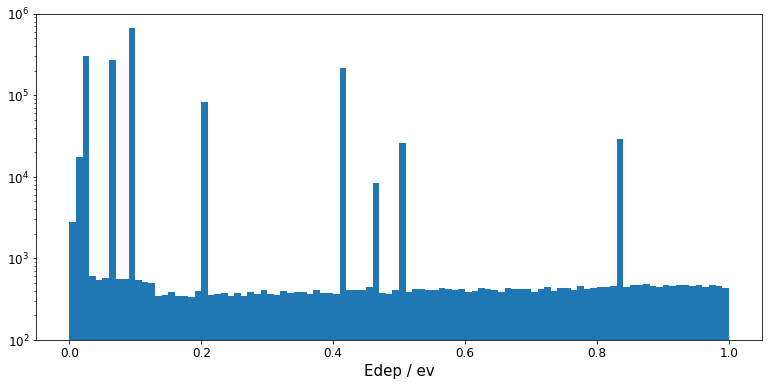

In [79]:
fig, ax = plt.subplots(1,1,figsize=(13,6))

_=plt.hist(dftot['edep'],bins=100,range=(0,1))
plt.xlabel('Edep / ev')
plt.yscale('log')
plt.ylim(100,1000000)
plt.savefig('WNDNA-LowEN-log.png')

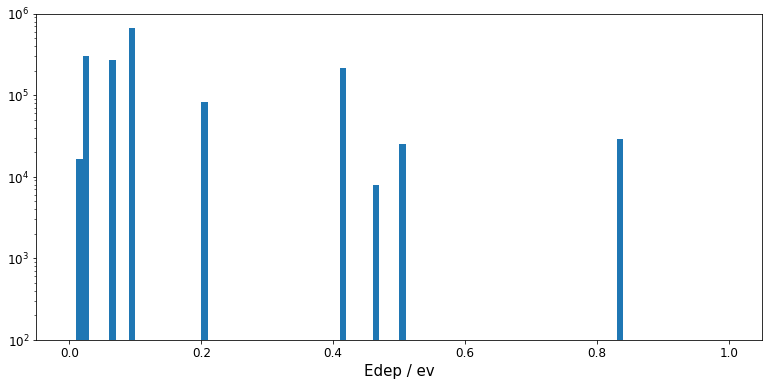

In [80]:
fig, ax = plt.subplots(1,1,figsize=(13,6))
#   else if (processName == "e-_G4DNAVibExcitation") flagProcess = 15;
_=plt.hist(dftot['edep'][dftot['flagProcess']==15],bins=100,range=(0,1))
plt.xlabel('Edep / ev')
plt.yscale('log')
plt.ylim(100,1000000)
plt.savefig('WNDNA-LowEN-log-DNAvib.png')

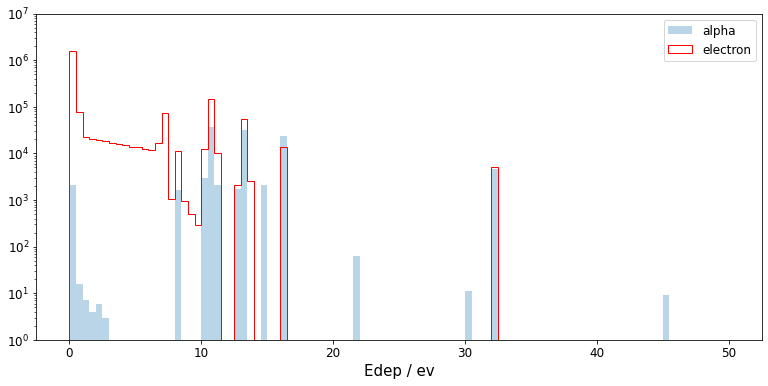

In [78]:
fig, ax = plt.subplots(1,1,figsize=(13,6))

_=plt.hist(dftot['edep'][dftot['flagParticle']==40],bins=100,range=(0,50),label="alpha",alpha=0.3)
_=plt.hist(dftot['edep'][dftot['flagParticle']==10],bins=100,range=(0,50),histtype='step',color='red',label='electron')

plt.xlabel('Edep / ev')
plt.yscale('log')
plt.ylim(1,10000000)
plt.legend()
plt.savefig('WNDNA-EdepParticle-log.png')

(1, 10000000)

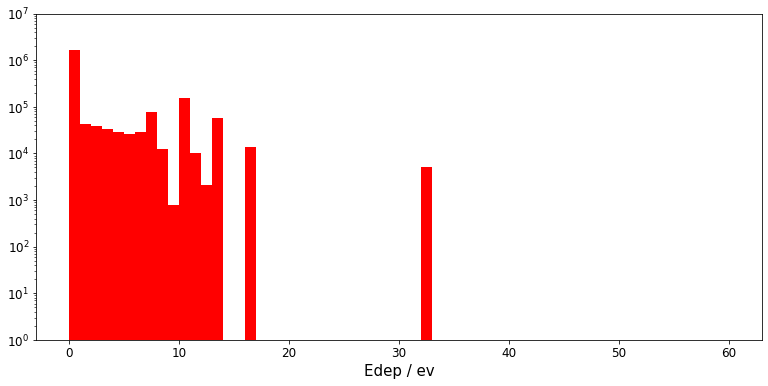

In [67]:
fig, ax = plt.subplots(1,1,figsize=(13,6))

_=plt.hist(dftot['edep'][dftot['flagParticle']==10],bins=60,range=(0,60),color='red')
plt.xlabel('Edep / ev')
plt.yscale('log')
plt.ylim(1,10000000)

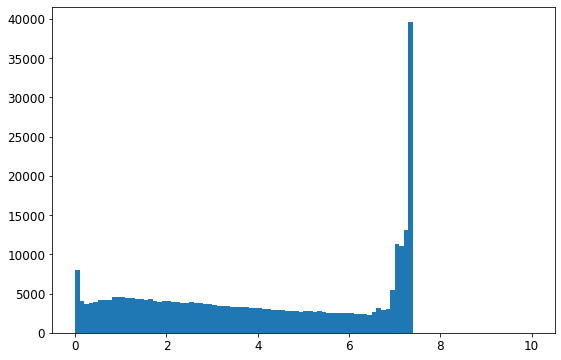

In [49]:
plt.figure(figsize=(9,6))

_=plt.hist(dftot['edep'][dftot['flagProcess']==0],bins=100,range=(0,10))

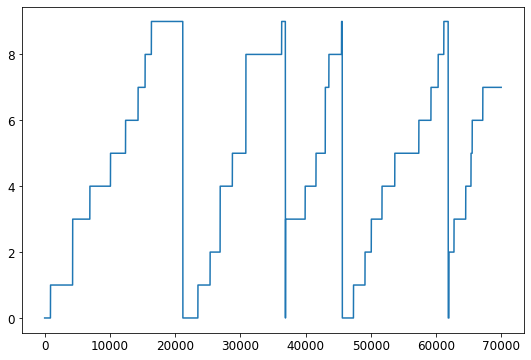

In [93]:
plt.figure(figsize=(9,6))

_=plt.plot(dftot['eventID'][0:70000])

In [88]:
dftot['eventID'].value_counts()

5.0    258118
1.0    241375
3.0    240262
7.0    238415
6.0    232208
8.0    225027
4.0    222184
9.0    220777
2.0    215607
0.0    213563
Name: eventID, dtype: int64